In [3]:
import pandas as pd
import numpy as np
from global_variables.global_variables import filename_proc, sleep_activities, start_date, data_name
from supporting_func.data_summaries import strip_activity, combine_sleep, split_data, convert_to_hours
from datetime import datetime, timedelta

In [4]:
#download just the sleep data
df = pd.read_csv(filename_proc)
df = df[sleep_activities]
time_frame = 30
data_dict = split_data(df,time_frame)
df_train = data_dict[0]
df_test = data_dict[1]

In [5]:
#create pd start sleep, stop sleep, time slept, date
sleep_summary_train = strip_activity('Sleep', df_train)

In [6]:
end_date_train = start_date + timedelta(days=time_frame)
daily_sleep_sum_train = combine_sleep(sleep_summary_train,start_date, end_date_train)
print(daily_sleep_sum_train)

                  Date  total_sleep first_sleep last_sleep  sleep_count
0  2012-01-28 12:00:00        10.18    21:04:00   07:38:00            3
1  2012-01-29 12:00:00         9.62    21:25:00   07:06:00            2
2  2012-01-30 12:00:00         9.23    21:22:00   07:00:00            3
3  2012-01-31 12:00:00         8.33    22:23:00   06:53:00            3
4  2012-02-01 12:00:00         9.98    21:26:00   07:35:00            4
5  2012-02-02 12:00:00         8.72    22:05:00   07:01:00            3
6  2012-02-03 12:00:00         8.25    22:54:00   07:15:00            3
7  2012-02-04 12:00:00         8.50    22:26:00   07:00:00            2
8  2012-02-05 12:00:00         9.18    21:48:00   07:12:00            4
9  2012-02-06 12:00:00         7.35    23:14:00   06:40:00            2
10 2012-02-07 12:00:00         8.63    22:01:00   06:50:00            3
11 2012-02-08 12:00:00         9.42    21:48:00   07:27:00            4
12 2012-02-09 12:00:00         8.78    23:04:00   08:01:00      

In [7]:
#Find average bed time and wake-up times

#converts first sleep times to floats
first_sleep_list = daily_sleep_sum_train['first_sleep'].to_numpy()
first_sleep_times = convert_to_hours(first_sleep_list)
average_first_sleep = first_sleep_times.mean()
print(average_first_sleep)

#convert end sleep times to floats
end_sleep_list = daily_sleep_sum_train['last_sleep'].to_numpy()
end_sleep_times = convert_to_hours(end_sleep_list, night_time=False)
average_end_sleep = end_sleep_times.mean()
print(average_end_sleep)



22.094252873563214
7.463218390804598


In [8]:
#find the distributions for time slept, average bed time, average wake time
average_sleep = daily_sleep_sum_train['total_sleep'].mean()
std_sleep = daily_sleep_sum_train['total_sleep'].std()

print(average_sleep)
print(std_sleep)

8.499
1.913053796312641


In [9]:
sleep_summary_test = strip_activity('Sleep', df_test)
start_date_test = end_date_train
end_date_test = datetime.strptime(df['Date'][df_test.index.tolist()[-1]], '%Y-%m-%d %H:%M:%S')

In [10]:
daily_sleep_sum_test = combine_sleep(sleep_summary_test,start_date_test, end_date_test)
print(daily_sleep_sum_test)

                  Date  total_sleep first_sleep last_sleep  sleep_count
0  2012-02-27 12:00:00         7.48    23:19:00   06:54:00            2
1  2012-02-28 12:00:00         8.05    22:45:00   06:59:00            3
2  2012-02-29 12:00:00         9.72    14:30:00   06:45:00            4
3  2012-03-01 12:00:00         6.78    00:16:00   07:06:00            2
4  2012-03-02 12:00:00         8.53    23:07:00   07:49:00            3
5  2012-03-03 12:00:00         9.27    21:30:00   06:59:00            3
6  2012-03-04 12:00:00         9.87    20:59:00   07:07:00            4
7  2012-03-05 12:00:00         7.47    22:43:00   06:23:00            2
8  2012-03-06 12:00:00         9.00    23:30:00   08:40:00            3
9  2012-03-07 12:00:00         9.38    22:03:00   07:39:00            3
10 2012-03-08 12:00:00         9.88    00:19:00   11:54:00            5
11 2012-03-09 12:00:00         9.07    23:00:00   08:14:00            3
12 2012-03-10 12:00:00        10.38    22:14:00   08:44:00      

In [11]:
#create the lists for the y axis

#converts first sleep times to floats
first_sleep_list = daily_sleep_sum_test['first_sleep'].to_numpy()
first_sleep_times = convert_to_hours(first_sleep_list)

#convert end sleep times to floats
end_sleep_list = daily_sleep_sum_test['last_sleep'].to_numpy()
end_sleep_times = convert_to_hours(end_sleep_list, night_time=False)

#total_sleep convert
total_sleep_times = daily_sleep_sum_test['total_sleep'].to_numpy()

#create the x-axis
count = total_sleep_times.size
index_array = np.arange(1,count+1,dtype=int)

#create the average lines for total sleep
average_total_sleep_list = np.full((count,),average_sleep)
one_std_up_total_sleep_list = np.full((count,),average_sleep+std_sleep)
one_std_down_total_sleep_list = np.full((count,),average_sleep-std_sleep)

#create the average lines for begin and end sleep
average_start_sleep_list = np.full((count,),average_first_sleep)
average_end_sleep_list = np.full((count,),average_end_sleep)



In [12]:
#packages for plotting the charts

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

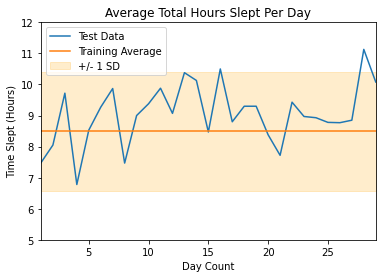

In [13]:
#PLOTTING AVERAGE SLEEP PER DAY

#plot the time slept per day
plt.plot(index_array,total_sleep_times,label="Test Data")

#plot the average from train
plt.plot(index_array,average_total_sleep_list,label="Training Average")

#fill between the two std deviations
plt.fill_between(index_array,one_std_down_total_sleep_list,one_std_up_total_sleep_list,color='orange',alpha=0.2)
plt.ylim([5, 12])
plt.xlim([1, count])


#add label
# where some data has already been plotted to ax
handles, labels = plt.gca().get_legend_handles_labels()
patch = mpatches.Patch(color='orange', alpha=0.2, label='+/- 1 SD')
handles.append(patch)
plt.legend(handles=handles, loc="upper left")

plt.title('Average Total Hours Slept Per Day')
plt.xlabel('Day Count')
plt.ylabel('Time Slept (Hours)')
plt.savefig(f'report_outputs/imgs/{data_name}_averagetothours.jpg',dpi=200)
plt.show()


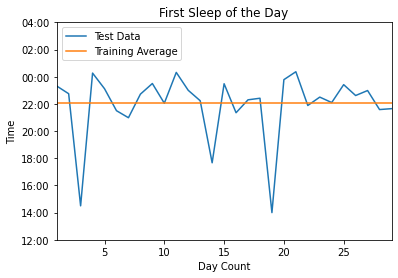

In [18]:
#PLOTTING BED TIME SLEEP PER DAY

#plot the time slept per day
plt.plot(index_array,first_sleep_times,label="Test Data")

#plot the average from train
plt.plot(index_array,average_start_sleep_list,label="Training Average")

#fill between the two std deviations
plt.yticks(np.arange(12, 28+1, 2.0))
plt.ylim([12, 28])
plt.xlim([1, count])


#add label
# where some data has already been plotted to ax
# handles, labels = plt.gca().get_legend_handles_labels()
# patch = mpatches.Patch(color='orange', alpha=0.2, label='+/- 1 SD')
# handles.append(patch)
labels = ["12:00","14:00","16:00","18:00","20:00","22:00","00:00","02:00","04:00"]
plt.gca().set_yticklabels(labels)
plt.legend(loc="upper left")

plt.title('First Sleep of the Day')
plt.xlabel('Day Count')
plt.ylabel('Time')
plt.savefig(f'report_outputs/imgs/{data_name}_firstsleep.jpg',dpi=200)
plt.show()


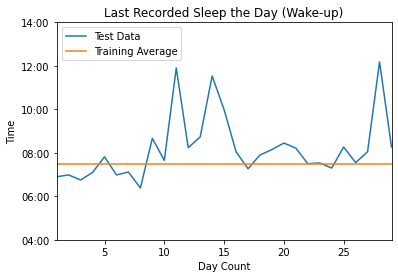

In [21]:
#PLOTTING WAKE_UP SLEEP PER DAY

#plot the time slept per day
plt.plot(index_array,end_sleep_times,label="Test Data")

#plot the average from train
plt.plot(index_array,average_end_sleep_list,label="Training Average")

#fill between the two std deviations
plt.yticks(np.arange(4, 14+1, 2.0))
plt.ylim([4, 14])
plt.xlim([1, count])


#add label
# where some data has already been plotted to ax
# handles, labels = plt.gca().get_legend_handles_labels()
# patch = mpatches.Patch(color='orange', alpha=0.2, label='+/- 1 SD')
# handles.append(patch)
labels = ["04:00","06:00","08:00","10:00","12:00","14:00"]
plt.gca().set_yticklabels(labels)
plt.legend(loc="upper left")

plt.title('Last Recorded Sleep the Day (Wake-up)')
plt.xlabel('Day Count')
plt.ylabel('Time')
plt.savefig(f'report_outputs/imgs/{data_name}_firstsleep.jpg',dpi=200)
plt.show()